In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from calcutta import Syndicate

try:
    plt.style.use('paper')
except:
    print("plot style not found")

In [28]:
year='2015'
pool=944.
draftfull = pd.read_pickle(year+'/draftfull.pkl')
simtourneys = np.load(year+'/simtourneys.npy')
bracketfile = year+'/bracket.pkl'

In [44]:
print(draftfull.shape)
draftfull.head()

(49, 10)


,Team,Mason Team,TeamID,Seed,Fraction Owned,Amount,Syndicate,Model Amount,Fraction Overpaid,Single Seed
0,Villanova,Villanova,1437,1,1.0,35.0,Duke,57.738883,-0.393823,1.0
1,SF Austin,Stephen F. Austin,1372,12,1.0,2.0,Duke,5.885364,-0.660174,12.0
2,Arizona,Arizona,1112,2,1.0,45.0,Duke,51.016602,-0.117934,2.0
3,Ohio St,Ohio State,1326,10,1.0,7.0,Duke,11.199004,-0.374944,10.0
4,Davidson,Davidson,1172,10,1.0,4.0,Medlen,2.011494,0.988572,10.0


In [39]:
%%time
def model_amount(row, bracketfile, simtourneys, pool):
    single = Syndicate(bracketfile)
    single.add(row['Team'])
    simresults = single.sim_results(simtourneys)
    row['Model Amount'] = simresults.mean()*pool
    return row    

def singleseed(row):
    return np.array(row['Seed']).mean()

draftfull['Single Seed'] = draftfull.apply(singleseed, axis=1)
draftfull['Model Amount'] = 0.
draftfull = draftfull.apply(model_amount, args=(bracketfile, simtourneys, pool), axis=1)
draftfull['Fraction Overpaid'] = (draftfull['Amount'] - draftfull['Model Amount'])/draftfull['Model Amount']

CPU times: user 25.4 s, sys: 1.21 s, total: 26.6 s
Wall time: 1.14 s


In [40]:
draftfull.head()

,Team,Mason Team,TeamID,Seed,Fraction Owned,Amount,Syndicate,Model Amount,Fraction Overpaid,Single Seed
0,Villanova,Villanova,1437,1,1.0,35.0,Duke,57.738883,-0.393823,1.0
1,SF Austin,Stephen F. Austin,1372,12,1.0,2.0,Duke,5.885364,-0.660174,12.0
2,Arizona,Arizona,1112,2,1.0,45.0,Duke,51.016602,-0.117934,2.0
3,Ohio St,Ohio State,1326,10,1.0,7.0,Duke,11.199004,-0.374944,10.0
4,Davidson,Davidson,1172,10,1.0,4.0,Medlen,2.011494,0.988572,10.0


Text(0, 0.5, 'Fraction Overpaid')

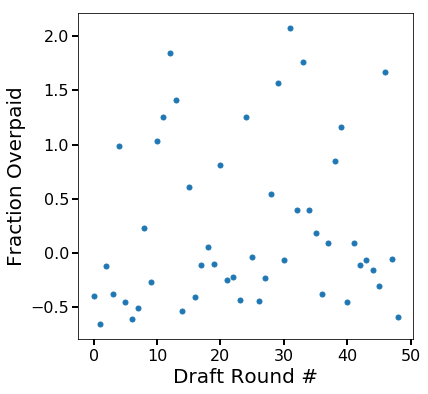

In [34]:
fig, ax = plt.subplots()
ax.plot(draftfull.index.values, draftfull['Fraction Overpaid'].values, '.')
ax.set_xlabel('Draft Round #')
ax.set_ylabel('Fraction Overpaid')

Text(0, 0.5, 'Fraction Overpaid')

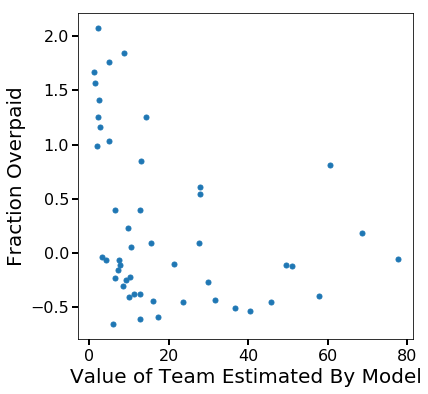

In [35]:
fig, ax = plt.subplots()
ax.plot(draftfull['Model Amount'], draftfull['Fraction Overpaid'].values, '.')
ax.set_xlabel('Value of Team Estimated By Model')
ax.set_ylabel('Fraction Overpaid')

Text(0, 0.5, 'Fraction Overpaid')

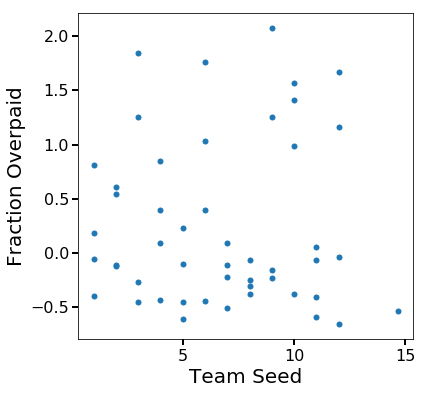

In [43]:
fig, ax = plt.subplots()
ax.plot(draftfull['Single Seed'].values, draftfull['Fraction Overpaid'].values, '.')
ax.set_xlabel('Team Seed')
ax.set_ylabel('Fraction Overpaid')